## Programming Analytics:  Healthcare Coverage in the U.S.A.
### Team Members:
* Yuttawee Kongtananan (GitHub ID: yuttk)
* Vel (Tien-Yun) Wu (GitHub ID: velwu)
* Eva (Yi-Ting) Huang (GitHub ID: iameva62948)

## Data sources

### Healthcare coverage

https://www.census.gov/library/publications/2019/demo/p60-267.html#


### National Center for Health Statistics

https://cdc.gov/nchs/nhis/nhis_2017_data_release.htm?fbclid=IwAR2s1_ur8ElTtcGjPHKl1zN7D0slSoTbLggHBFRR8X-awwF_YLCJIgvn_4Q

### Us Census Bureau:Income Data Tables

https://www.census.gov/topics/income-poverty/income/data/tables.html

### Consumer Price Index

https://www.bls.gov/cpi/

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "fantasy"
import numpy as np
import random
import scipy
import scipy.misc
import scipy.cluster

from pandas.io.json import json_normalize
import plotly.express as px
import plotly.graph_objects as pgo
import plotly.offline as pol
import importlib
import ipywidgets

Import of central_analysis.py is successful
Test function intact. File succesfully imported.


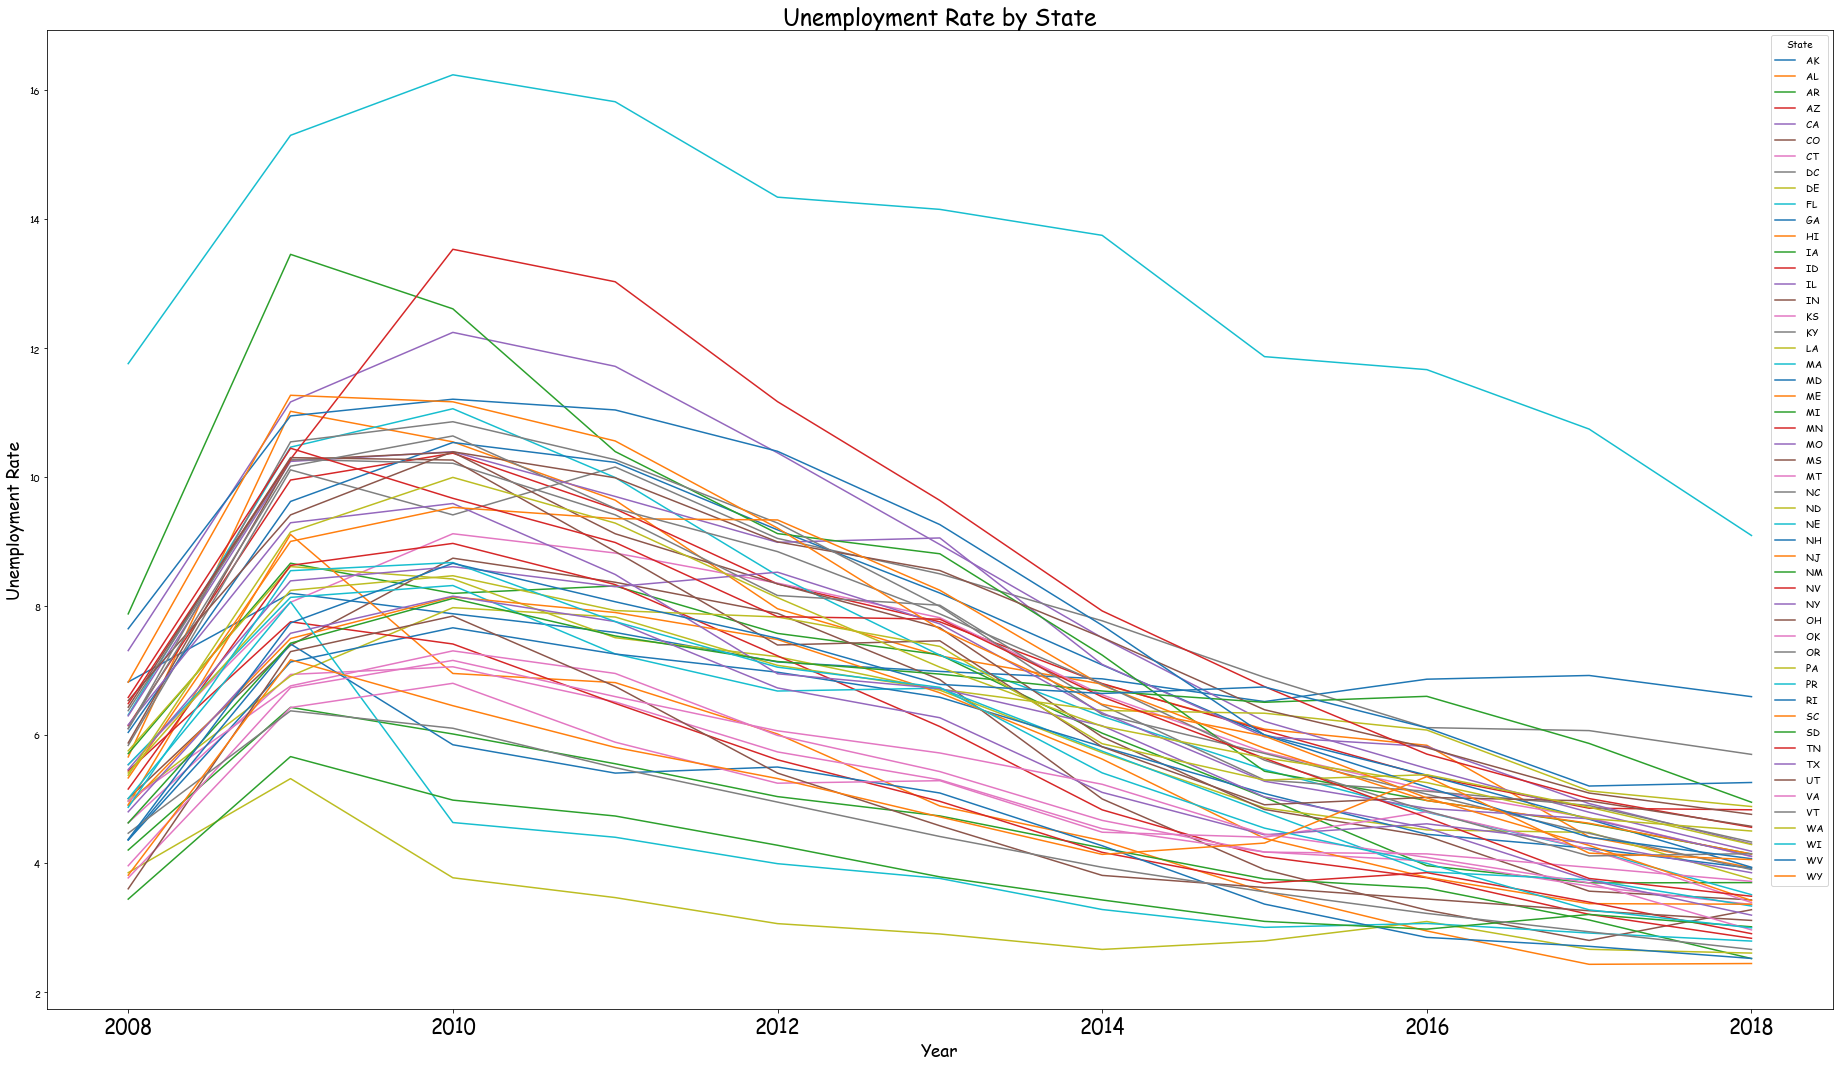

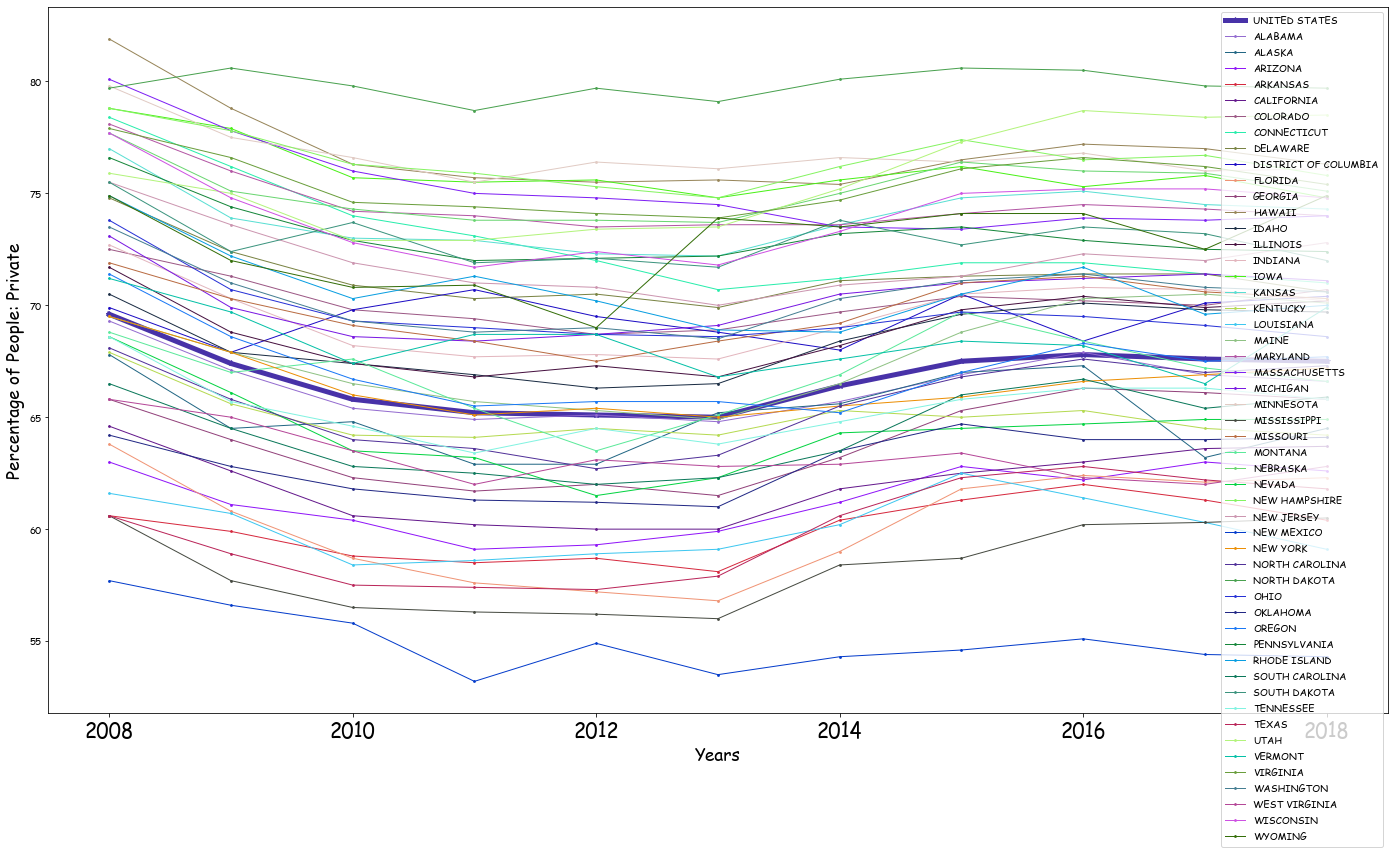

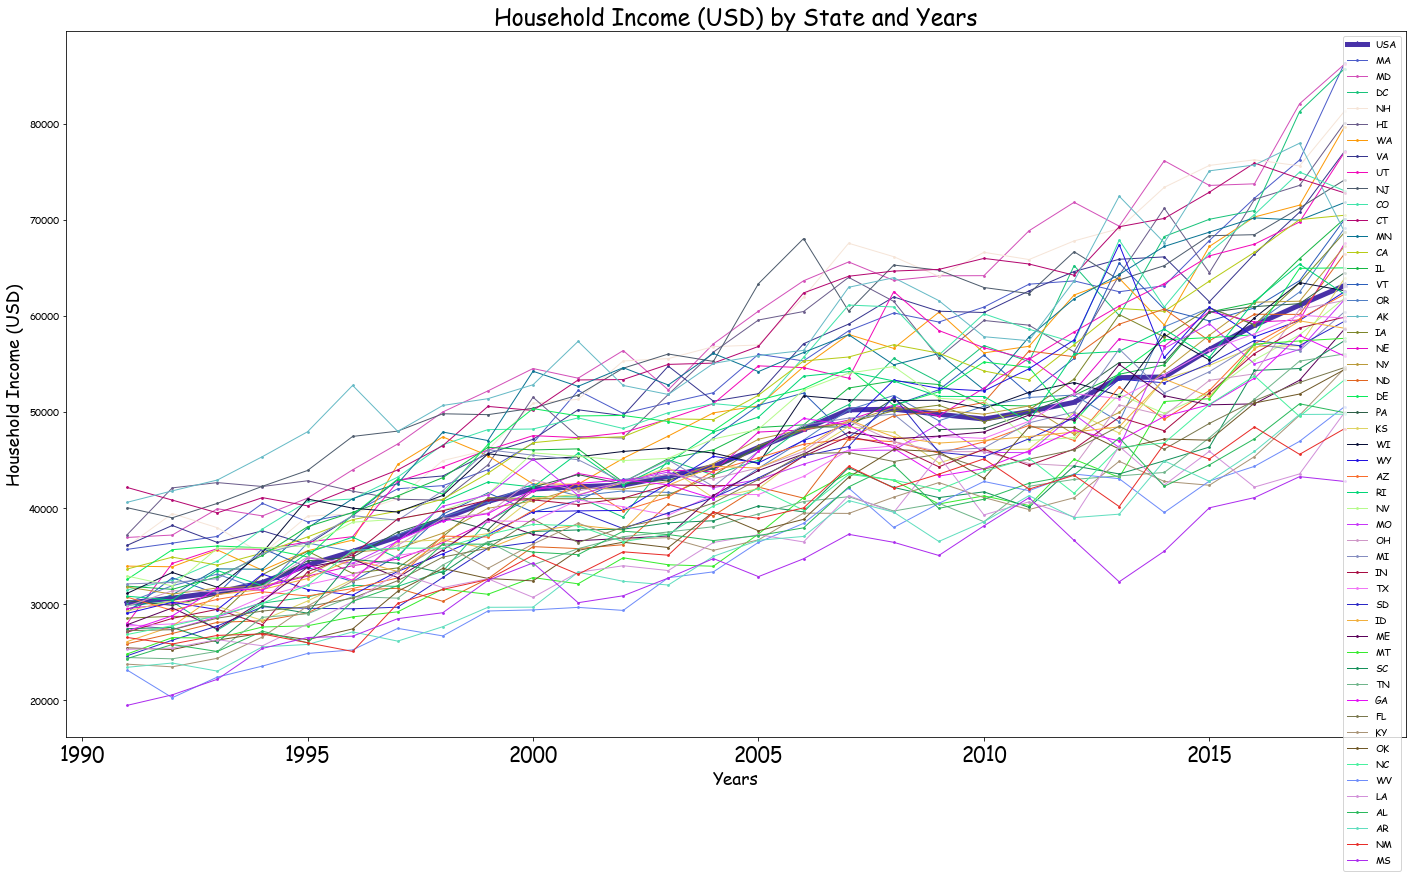

Healthcare coverage  growth rate & Unemployment  raw value Correlations:
AL  :  -0.5578785118728914
AK  :  -0.5078568817331439
AZ  :  -0.5545602745799143
AR  :  -0.20656176466257478
CA  :  -0.6905523774244152
CO  :  -0.6721279912419591
CT  :  -0.6689368795841828
DE  :  -0.5702329966806751
DC  :  -0.15032815116214732
FL  :  -0.6796575150501821
GA  :  -0.5236546126189067
HI  :  -0.7469514071399467
ID  :  -0.5797993982034092
IL  :  -0.607679760400952
IN  :  -0.6436790543401703
IA  :  -0.36256815133294185
KS  :  -0.5774764763037141
KY  :  -0.47432668323820903
LA  :  0.01559496007233269
ME  :  -0.6329256231577688
MD  :  -0.5983412040542273
MA  :  -0.8465267752740046
MI  :  -0.6737519709007599
MN  :  -0.614352354038049
MS  :  -0.5070781923372476
MO  :  -0.47911407067564854
MT  :  -0.29099634138627845
NE  :  -0.7541633149940865
NV  :  -0.5610096127434444
NH  :  -0.3512838379543684
NJ  :  -0.7589769539394332
NM  :  -0.2698101239875752
NY  :  -0.7309694572159828
NC  :  -0.6430886196222737
ND  :

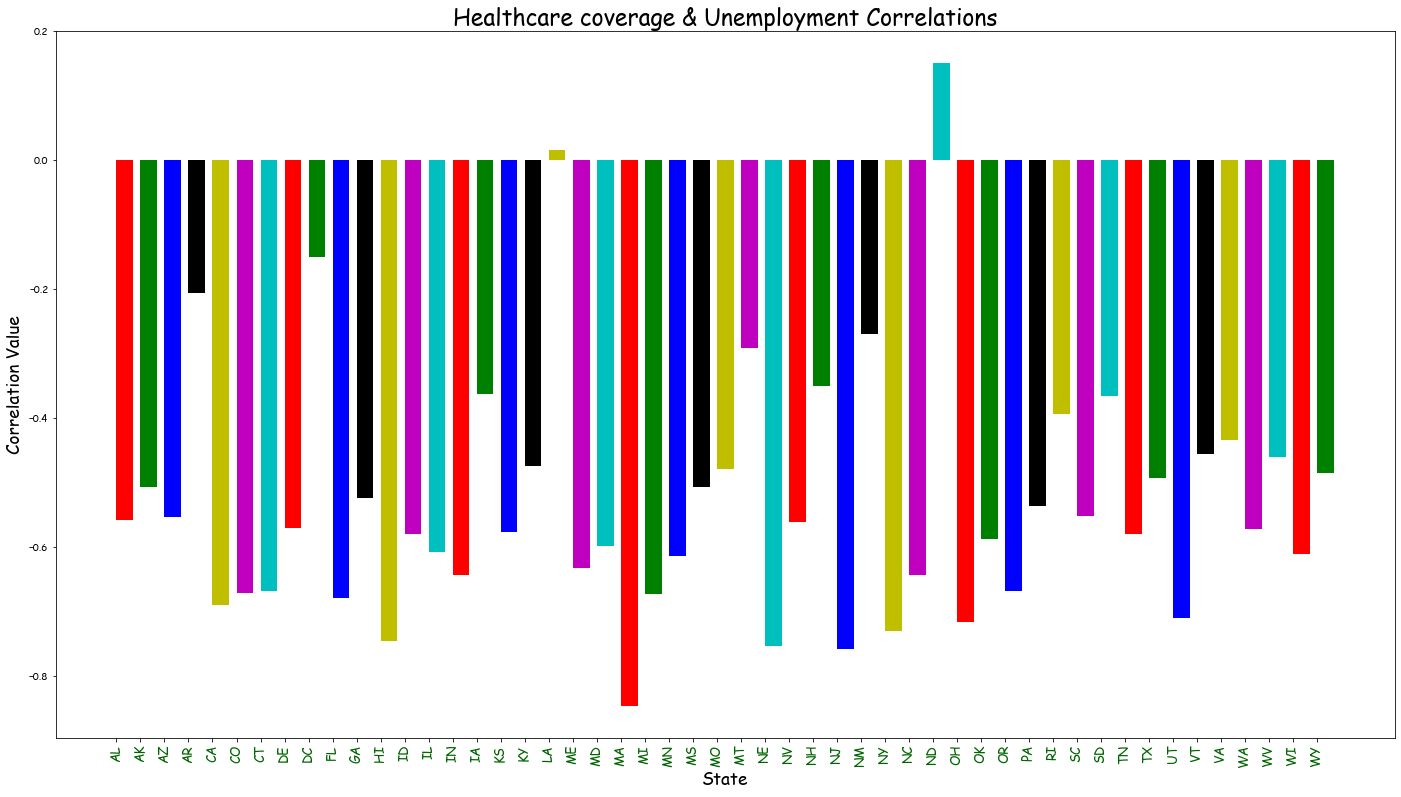

Healthcare coverage  raw value & Household Income  growth rate Correlations:
US  :  0.20580083540104668
AL  :  -0.08806099285918847
AK  :  0.06107710916752366
AZ  :  0.2119519489949668
AR  :  0.1774521093133332
CA  :  0.017446463924075985
CO  :  -0.3134151609857577
CT  :  -0.18771034668205377
DE  :  0.09650028097124434
DC  :  0.11828202718454908
FL  :  0.2935568573531965
GA  :  0.11740341151544773
HI  :  -0.4004747762739418
ID  :  0.255268236183158
IL  :  0.54443419199744
IN  :  0.17053752258123234
IA  :  -0.2966366355206737
KS  :  0.1163202470398494
KY  :  -0.12540182237547204
LA  :  0.09033443517327397
ME  :  0.05298723828571756
MD  :  -0.17202017161282018
MA  :  -0.5155213828264129
MI  :  -0.154738291101631
MN  :  -0.3936482551079615
MS  :  0.31728564822497174
MO  :  -0.08067946362577648
MT  :  -0.04134687676336808
NE  :  -0.10991961393201022
NV  :  -0.10691895351359927
NH  :  -0.38839122798296405
NJ  :  0.0682464181948746
NM  :  0.3999684842112759
NY  :  0.03678474377361759
NC  :  

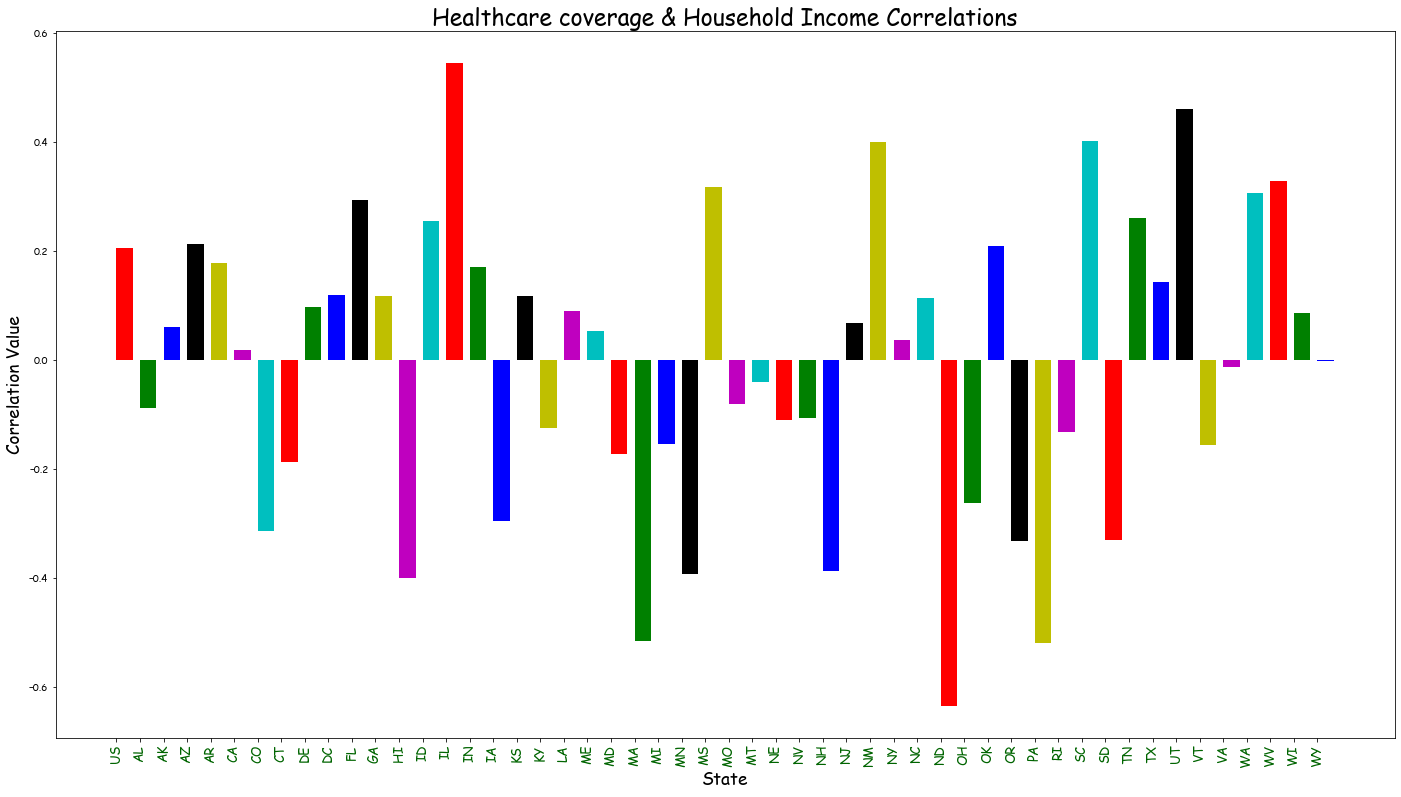

Healthcare coverage  raw value & Household Income: CPI Adjusted  growth rate Correlations:
US  :  0.4196569398921929
AL  :  0.04693099395321238
AK  :  0.051306844406010965
AZ  :  0.37638916696231445
AR  :  0.2749661720165326
CA  :  0.3471848218179297
CO  :  -0.13061888058783006
CT  :  -0.1837869864940981
DE  :  0.1500163622802974
DC  :  0.1404724769367594
FL  :  0.45173402663113865
GA  :  0.5066616094608156
HI  :  -0.29322013742861786
ID  :  0.46913094162045593
IL  :  0.6041688230860108
IN  :  0.3716846861628746
IA  :  -0.21404275444835696
KS  :  0.19136713256405524
KY  :  -0.08925849948765567
LA  :  0.06874821285174103
ME  :  0.21384360957251108
MD  :  -0.021061128142412622
MA  :  -0.3019286995219266
MI  :  0.0347772395331532
MN  :  -0.21442344087086523
MS  :  0.5109067400830266
MO  :  0.013449371403214045
MT  :  -0.06797230200004545
NE  :  -0.023061346638477597
NV  :  0.08357886582404862
NH  :  -0.21154825991819387
NJ  :  0.35645078271598746
NM  :  0.38619781581214413
NY  :  0.321982

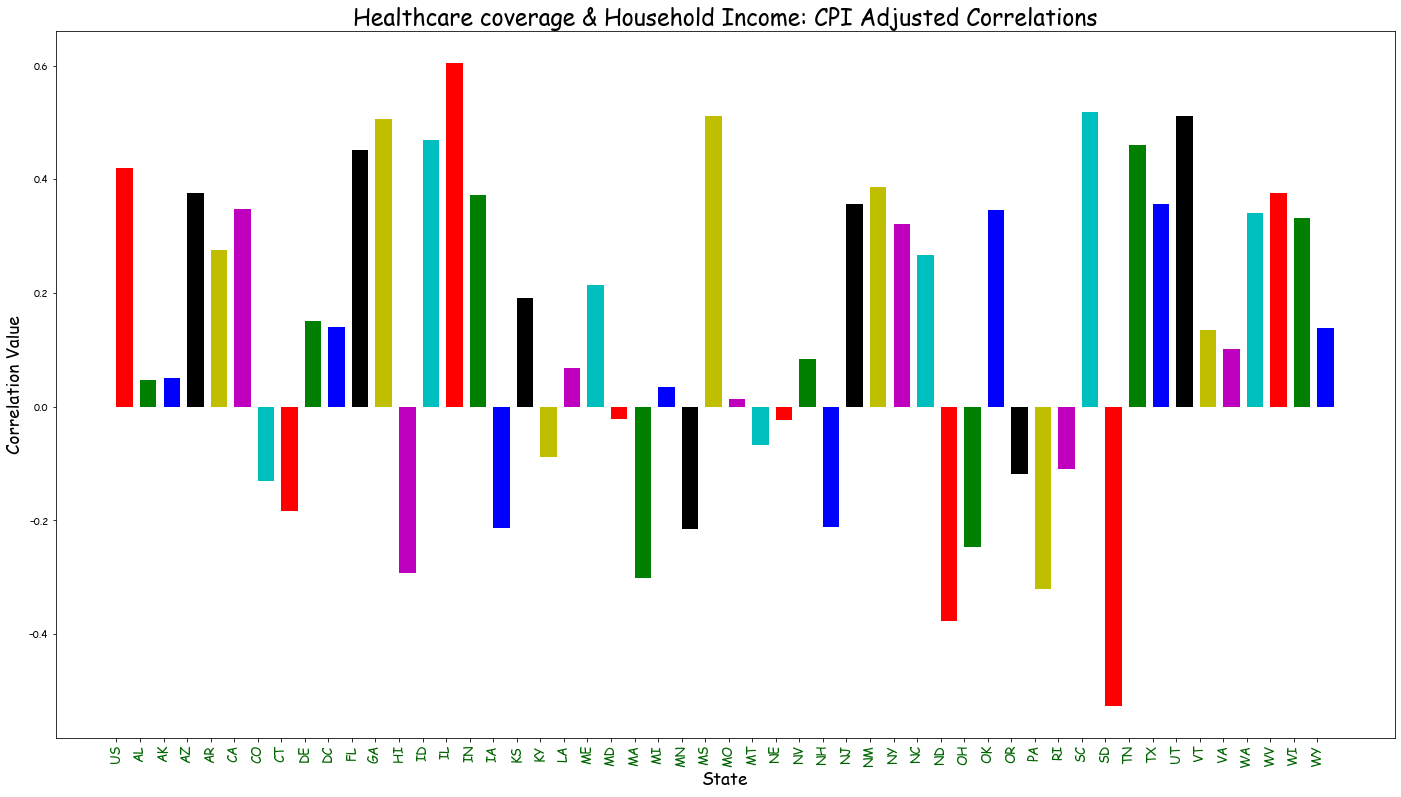

In [2]:
clas = importlib.import_module('central_analysis')
print("Import of central_analysis.py is successful")

# This line below is an integrated testing of the whole program. Might take some time to run. Use with caution.
# clas.main_test()

## Dataset 1: Unemployment Rate

In [3]:
plt.clf()
year_slider = range(2009, 2019, 1)
data_toggle = ipywidgets.Checkbox(False, description='Show Data')
@ipywidgets.interact(end_year = year_slider, show_data = data_toggle)
def check_unployment(end_year = 2012, show_data = False):
    data_un = clas.read_unemployment_by_year(2008, end_year, True)
    if show_data:
        display(data_un)

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='end_year', index=3, options=(2009, 2010, 2011, 2012, 2013, 2014, 2…

## Dataset 2: Insurance Coverage of different Types and Years
- Different types of insurance have different coverages
- At the same time, a single type of insurance also has ebbs and flows thorughout the years

In [4]:
plt.clf()
insurance_type = ['Any coverage', 'Uninsured', 'Private', '..Employer-based', '..Direct-purchase', '..TRICARE', 'Public', '..Medicaid', '..Medicare', '..VA Care']
year_slider = ipywidgets.IntSlider(min= 2008,max=2018,step=1,value=2012, description='Year')
color_theme = ['Blackbody','Bluered','Blues','Earth','Electric','Greens','Greys','Hot','Jet','Picnic','Portland','Rainbow','RdBu','Reds','Viridis','YlGnBu','YlOrRd']

@ipywidgets.interact(insurance_type = insurance_type,
                     choice_of_year = year_slider, 
                     map_theme = color_theme)
def customized_choropleth(insurance_type = 'Any coverage', choice_of_year = 2012, map_theme = 'Earth'):
    demo_df_to_map = clas.read_health_care_coverage_by_year(2008, 2018, insurance_type, False)
    clas.spawn_choropleth_from_dataframe(demo_df_to_map, choice_of_year, str(insurance_type) + ' type Year ' + str(choice_of_year), map_theme, "% by state", True)

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='insurance_type', options=('Any coverage', 'Uninsured', 'Private', …

## Dataset 3: Household Income
-  We can pass the same dataset into different plots and switch between them efficiently.
- This is a demomonstration of the **modularity** and **optimization** of our functions which divide the tasks of getting data and plotting them.

In [5]:
plt.clf()
plot_type = ["Line Plot", "Choropleth Map"]
@ipywidgets.interact(plot_type = plot_type)
def choose_a_graph_for_HHI(plot_type = "Line Plot"):
    demo_df_to_map = clas.read_household_income_by_year(1984, 2018, False)
    if plot_type == "Line Plot":
        clas.spawn_line_plot_from_dataframe(demo_df_to_map, "Household Income (USD) by State and Years", "Years", "Household Income (USD)")
    if plot_type == "Choropleth Map":
        clas.spawn_choropleth_from_dataframe(demo_df_to_map, 2018, "Household Income (USD) by State Year 2018", "Greens", "% by state", True)

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='plot_type', options=('Line Plot', 'Choropleth Map'), value='Line P…

## Dataset 4 : CPI

In [6]:
demo_df_cpi = clas.read_cpi_by_year(2003, 2020)
demo_df_cpi

,Years,CPI All items,CPI Medical,CPI All items Growth,CPI Medical Growth
68,2003,282.712487,230.703265,0.022900,0.043289
69,2004,290.103915,240.503673,0.026145,0.042481
70,2005,300.261587,249.743089,0.035014,0.038417
71,2006,310.179259,253.052907,0.033030,0.013253
72,2007,319.028324,264.378149,0.028529,0.044754
73,2008,331.171117,275.691428,0.038062,0.042792
74,2009,329.985225,285.144522,-0.003581,0.034289
75,2010,335.103959,283.881984,0.015512,-0.004428
76,2011,345.417992,290.193227,0.030779,0.022232
77,2012,352.577801,299.527723,0.020728,0.032166


## Correlations:

In [7]:
demo_df_un = clas.read_unemployment_by_year(2008, 2018, False)
demo_df_hc = clas.read_health_care_coverage_by_year(2008, 2018, 'Private', False)
demo_df_hh_ic = clas.read_household_income_by_year(1991, 2018, False)

In [8]:
insurance_type = ['Any coverage', 'Uninsured', 'Private', '..Employer-based', '..Direct-purchase', '..TRICARE', 'Public', '..Medicaid', '..Medicare', '..VA Care']
growth_rate_var = ["None", "First", "Second", "Both"]
data_toggle = ipywidgets.Checkbox(False, description='Show Data')
plot_toggle = ipywidgets.Checkbox(True, description='Show Plot')

@ipywidgets.interact(insurance_type = insurance_type, corr_type = growth_rate_var, data_toggle = data_toggle, plot_toggle = plot_toggle)
def choose_a_method_for_corr(insurance_type = "Any coverage", corr_type = "None", data_toggle = False, plot_toggle = True):
    demo_df_hc = clas.read_health_care_coverage_by_year(2008, 2018, insurance_type, False)
    clas.merging_dataframes_on_years_plus_correlations(demo_df_hc, demo_df_hh_ic, "Healthcare coverage", "HH Income", 
                                                   corr_type, data_toggle, plot_toggle)

interactive(children=(Dropdown(description='insurance_type', options=('Any coverage', 'Uninsured', 'Private', …

In [9]:
insurance_type = ['Any coverage', 'Uninsured', 'Private', '..Employer-based', '..Direct-purchase', '..TRICARE', 'Public', '..Medicaid', '..Medicare', '..VA Care']
growth_rate_var = ["None", "First", "Second", "Both"]
data_toggle = ipywidgets.Checkbox(False, description='Show Data')
plot_toggle = ipywidgets.Checkbox(True, description='Show Plot')
@ipywidgets.interact(insurance_type = insurance_type, corr_type = growth_rate_var, data_toggle = data_toggle, plot_toggle = plot_toggle)
def choose_a_method_for_corr_2(insurance_type = "Any coverage", corr_type = "None", data_toggle = False, plot_toggle = True):
    demo_df_hc = clas.read_health_care_coverage_by_year(2008, 2018, insurance_type, False)
    clas.merging_dataframes_on_years_plus_correlations(demo_df_hc, demo_df_un, "Healthcare coverage", "Unemployment", corr_type, data_toggle, plot_toggle)


interactive(children=(Dropdown(description='insurance_type', options=('Any coverage', 'Uninsured', 'Private', …

In [10]:
### Stuffs below are just testing codes for newer functions

In [11]:
clas.read_cpi_by_year(2008, 2018)

,Years,CPI All items,CPI Medical,CPI All items Growth,CPI Medical Growth
73,2008,331.171117,275.691428,0.038062,0.042792
74,2009,329.985225,285.144522,-0.003581,0.034289
75,2010,335.103959,283.881984,0.015512,-0.004428
76,2011,345.417992,290.193227,0.030779,0.022232
77,2012,352.577801,299.527723,0.020728,0.032166
78,2013,357.823195,307.488614,0.014877,0.026578
79,2014,363.719483,316.259384,0.016478,0.028524
80,2015,366.718079,325.255346,0.008244,0.028445
81,2016,371.734297,336.737765,0.013679,0.035303
82,2017,377.982001,346.200748,0.016807,0.028102


In [12]:
clas.read_household_income_by_year_ver2(2008, 2018, True)

,Years,USA,AL,AK,AZ,AR,CA,CO,CT,DE,...,VT,VA,WA,WV,WI,WY,CPI All items,CPI Medical,CPI All items Growth,CPI Medical Growth
1,2009,49955.887249,40123.679053,61825.390805,45903.375593,36669.309286,56335.732866,56130.999736,65084.059787,52301.285897,...,52506.019027,60718.426873,60609.035152,40635.511877,51421.134158,52658.565280,329.985225,285.144522,-0.003581,0.034289
2,2010,48523.306106,40307.745938,56964.368285,46179.660750,37997.581230,53453.823876,59312.937265,64989.876539,54370.602795,...,55073.696401,59444.890407,55305.106762,42123.578726,49581.885415,51403.626553,335.103959,283.881984,0.015512,-0.004428
3,2011,48559.409068,41318.280901,55716.135018,47169.197832,40068.740027,51773.484311,56878.363252,63461.736208,53027.875887,...,50313.422965,60746.313146,55152.483428,40572.242910,50503.570489,52881.384682,345.417992,290.193227,0.030779,0.022232
4,2012,49980.996028,42581.375058,62355.497876,46088.675875,38225.660133,55862.092900,56092.320747,62942.333963,47977.523913,...,54453.294416,63319.515755,60924.166454,42668.567732,52001.122923,56344.101839,352.577801,299.527723,0.020728,0.032166
5,2013,52799.487985,46626.327730,71409.620103,51839.766023,38798.780235,59902.809976,66916.465952,68275.250946,53298.070441,...,64552.633318,64940.857602,62984.956069,42437.643893,50967.739395,66452.370424,357.823195,307.488614,0.014877,0.026578
6,2014,52787.161756,41592.627704,66532.660461,48455.539168,44193.765592,59506.440038,59952.096416,69023.613991,56589.505908,...,59723.857388,65082.555602,58110.443569,38910.819124,57138.460122,54787.204618,363.719483,316.259384,0.016478,0.028524
7,2015,56053.877481,44145.056848,74497.820889,51820.776252,42448.047428,63115.658352,66051.454893,72292.998014,57283.738195,...,59007.526840,60983.238566,66693.164475,42473.834830,54971.798418,60426.825776,366.718079,325.255346,0.008244,0.028445
8,2016,58242.322194,46583.795395,74701.186732,56329.487242,45287.526634,65737.794069,69613.775774,74898.487913,57262.721829,...,60016.059813,65554.303970,69361.230262,43755.482962,59009.823789,57048.650047,371.734297,336.737765,0.013679,0.035303
9,2017,60125.476594,50024.247039,76697.944634,58713.212390,48928.660463,68880.334495,73744.581539,73075.821331,63887.252765,...,62629.393491,69640.557497,70357.507779,46180.842784,62432.699312,58551.923163,377.982001,346.200748,0.016807,0.028102
10,2018,68000.806082,53747.103508,73979.762346,67036.423578,53580.273945,75868.703524,78607.937311,78368.994325,69973.700201,...,75413.420265,83039.145761,85810.669141,54432.719194,67408.830214,67311.961436,351.180026,352.108846,-0.070908,0.017066


In [13]:
clas.read_household_income_by_year_ver2(2008, 2018, False)

,Years,USA,AL,AK,AZ,AR,CA,CO,CT,DE,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
24,2008,50303.0,44476.0,63989.0,46914.0,39586.0,57014.0,60943.0,64682.0,50702.0,...,51600.0,39702.0,46490.0,62537.0,50706.0,61985.0,56631.0,37994.0,51200.0,53337.0
25,2009,49777.0,39980.0,61604.0,45739.0,36538.0,56134.0,55930.0,64851.0,52114.0,...,45826.0,40517.0,47475.0,58491.0,52318.0,60501.0,60392.0,40490.0,51237.0,52470.0
26,2010,49276.0,40933.0,57848.0,46896.0,38587.0,54283.0,60233.0,65998.0,55214.0,...,45352.0,38591.0,47266.0,56701.0,55928.0,60367.0,56163.0,42777.0,50351.0,52201.0
27,2011,50054.0,42590.0,57431.0,48621.0,41302.0,53367.0,58629.0,65415.0,54660.0,...,47223.0,42279.0,49047.0,55493.0,51862.0,62616.0,56850.0,41821.0,52058.0,54509.0
28,2012,51017.0,43464.0,63648.0,47044.0,39018.0,57020.0,57255.0,64247.0,48972.0,...,49415.0,42995.0,51926.0,58341.0,55582.0,64632.0,62187.0,43553.0,53079.0,57512.0
29,2013,53585.0,47320.0,72472.0,52611.0,39376.0,60794.0,67912.0,69291.0,54091.0,...,53413.0,43361.0,51406.0,61047.0,65513.0,65907.0,63922.0,43069.0,51726.0,67441.0
30,2014,53657.0,42278.0,67629.0,49254.0,44922.0,60487.0,60940.0,70161.0,57522.0,...,53053.0,43716.0,53875.0,63383.0,60708.0,66155.0,59068.0,39552.0,58080.0,55690.0
31,2015,56516.0,44509.0,75112.0,52248.0,42798.0,63636.0,66596.0,72889.0,57756.0,...,55065.0,47330.0,56473.0,66258.0,59494.0,61486.0,67243.0,42824.0,55425.0,60925.0
32,2016,59039.0,47221.0,75723.0,57100.0,45907.0,66637.0,70566.0,75923.0,58046.0,...,57450.0,51344.0,58146.0,67481.0,60837.0,66451.0,70310.0,44354.0,59817.0,57829.0
33,2017,61136.0,50865.0,77987.0,59700.0,49751.0,70038.0,74984.0,74304.0,64961.0,...,56914.0,55306.0,60092.0,69789.0,63682.0,70811.0,71540.0,46957.0,63482.0,59536.0
